# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df=pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [8]:
def convert(i):
    if i=='Male':
        return 0
    else:
        return 1
    

In [9]:
df['Gender']=df['Gender'].apply(convert)

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Drop user ID column

In [11]:
df.drop(columns='User ID',inplace=True)

In [12]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

<AxesSubplot:>

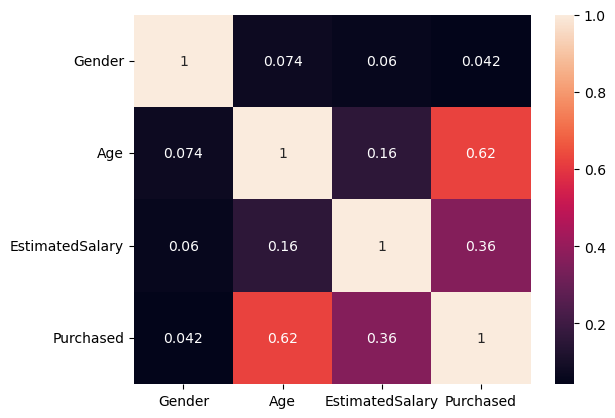

In [13]:
sns.heatmap(df.corr(),annot=True)

### Plot a countplot of gender with respect to purchased

<AxesSubplot:xlabel='Gender', ylabel='count'>

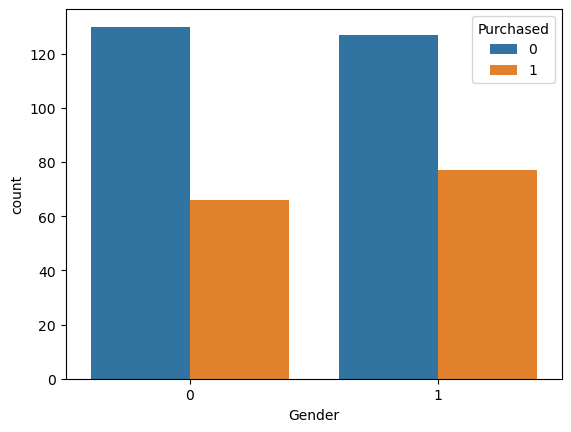

In [14]:
sns.countplot(data=df,x='Gender',hue='Purchased')

### Plot a displot of Age

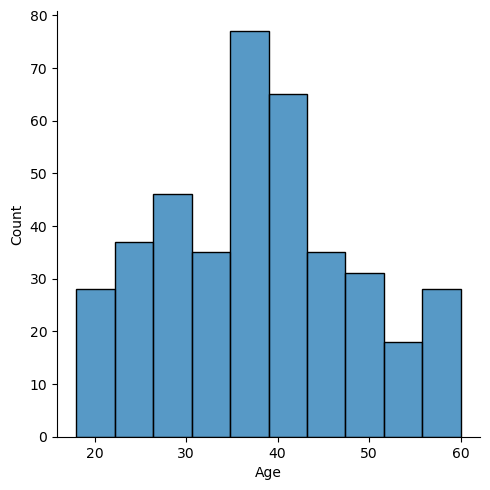

In [15]:
sns.displot(data=df,x='Age')

### Plot pairplot of the dataset

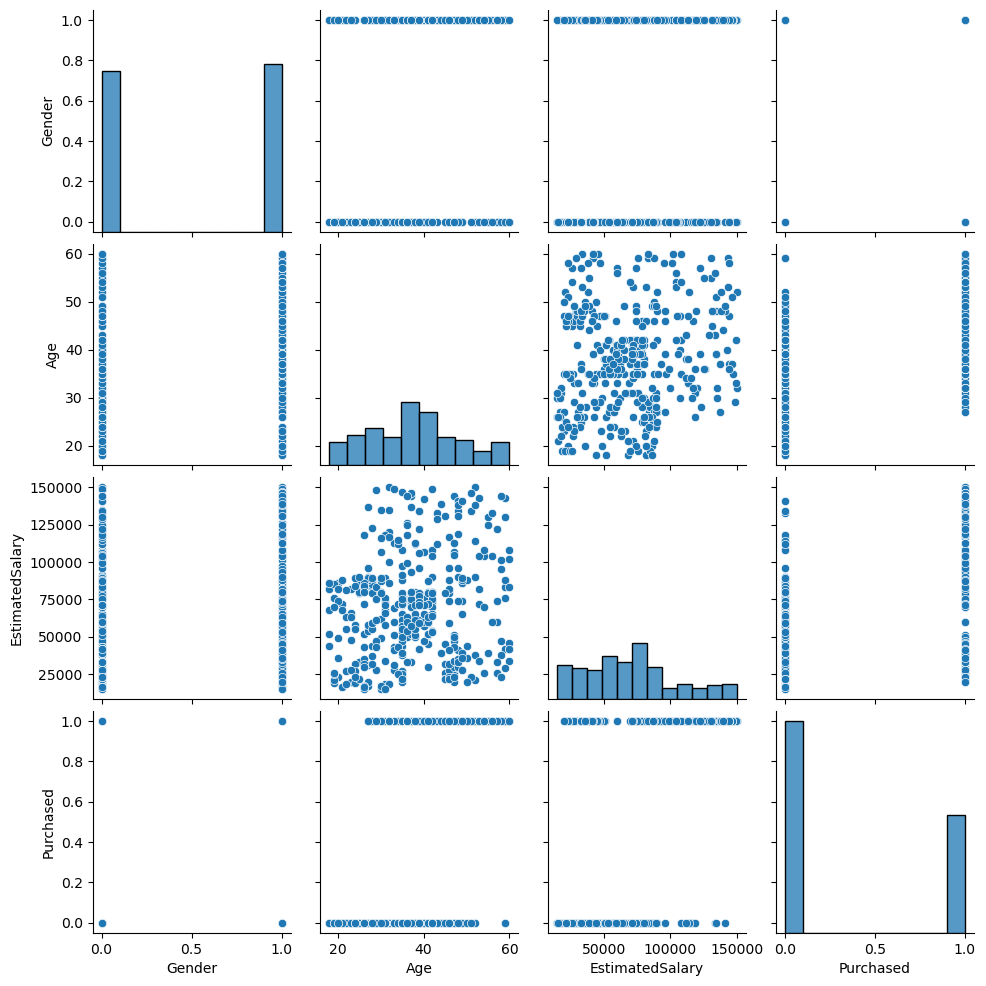

In [16]:
sns.pairplot(data=df)

## Data Preprocessing

### Split the dataset into input and target variables

In [17]:
x=df.drop(columns='Purchased')
y=df['Purchased']

### Scale the data using StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
x_scaled=scaler.fit_transform(x)

In [21]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [22]:
x.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Check shape of X_train and X_test

In [25]:
x_train.shape

(320, 3)

In [26]:
x_test.shape

(80, 3)

## ML Models

### Logistic Regression Classifier

In [27]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
model_log=LogisticRegression()

In [29]:
model_log.fit(x_train,y_train)

LogisticRegression()

In [30]:
model_log.score(x_train,y_train)

0.846875

In [31]:
cross_val_score(model_log,x_train,y_train,cv=5,scoring='accuracy').mean()

0.83125

In [32]:
y_pred_log=model_log.predict(x_test)
y_pred_log

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred_log)

0.9

<AxesSubplot:>

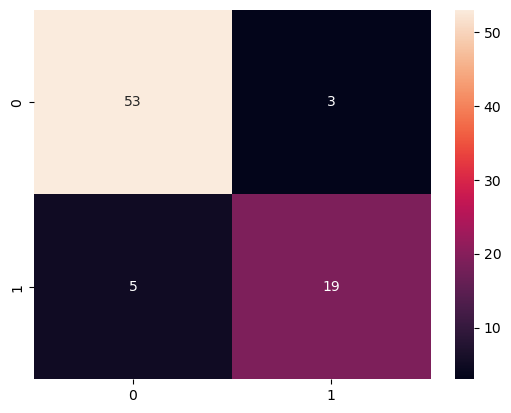

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred_log),annot=True,fmt='d')

In [35]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        56
           1       0.86      0.79      0.83        24

    accuracy                           0.90        80
   macro avg       0.89      0.87      0.88        80
weighted avg       0.90      0.90      0.90        80



### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model_rand=RandomForestClassifier(n_estimators=20)

In [38]:
model_rand.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [39]:
model_rand.score(x_train,y_train)

0.990625

In [40]:
y_pred_rand=model_rand.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred_rand)

0.8875

<AxesSubplot:>

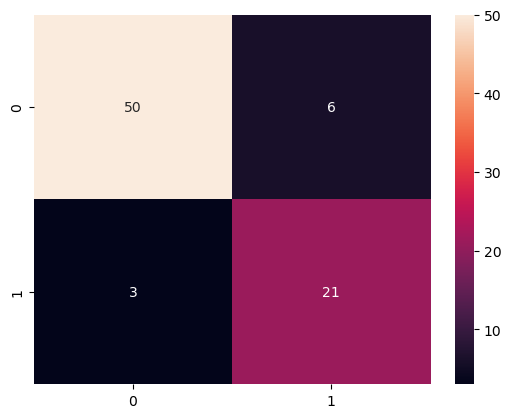

In [42]:
sns.heatmap(confusion_matrix(y_test,y_pred_rand),annot=True,fmt='d')

In [43]:
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        56
           1       0.78      0.88      0.82        24

    accuracy                           0.89        80
   macro avg       0.86      0.88      0.87        80
weighted avg       0.89      0.89      0.89        80



In [44]:
cross_val_score(model_rand,x_train,y_train,cv=5,scoring='accuracy').mean()

0.865625

### Support Vector Machine

In [45]:
from sklearn.svm import SVC

In [46]:
model_svc=SVC()

In [47]:
model_svc.fit(x_train,y_train)

SVC()

In [48]:
model_svc.score(x_train,y_train)

0.909375

In [49]:
y_pred_svc=model_svc.predict(x_test)
y_pred_svc

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred_svc)

0.9375

<AxesSubplot:>

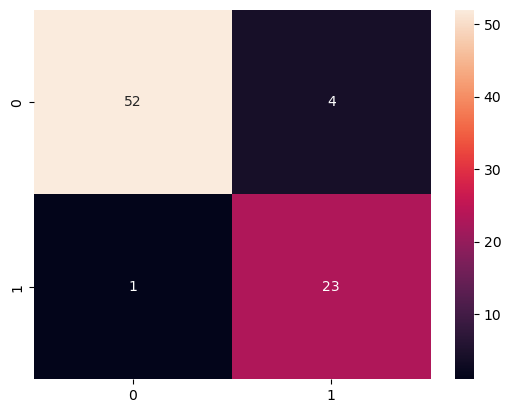

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot=True,fmt='d')

In [52]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        56
           1       0.85      0.96      0.90        24

    accuracy                           0.94        80
   macro avg       0.92      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [53]:
cross_val_score(model_svc,x_train,y_train,cv=5,scoring='accuracy').mean()

0.89375

### Assign cross val scores of all models into a dataframe

In [54]:
models=['Logistic Regression','Random Forest Classification','Support Vector Classification']
scores=[cross_val_score(model_log,x_train,y_train,cv=5,scoring='accuracy').mean(),cross_val_score(model_rand,x_train,y_train,cv=5,scoring='accuracy').mean(),cross_val_score(model_svc,x_train,y_train,cv=5,scoring='accuracy').mean()]

In [55]:
all_scores= pd.DataFrame({'Model': models, 'Score': scores})
all_scores

,Model,Score
0,Logistic Regression,0.831250
1,Random Forest Classification,0.884375
2,Support Vector Classification,0.893750


In [57]:
import joblib
joblib.dump(model_svc,'SVC Model')

['SVC Model']

***

## Deploy the model with highest score using Tkinter

In this case its SVM Classifier

#### Import all modules from Tkinter

In [58]:
from tkinter import *

### Define a function that will output to an entry box in Tkinter

In [59]:
loaded_model=joblib.load('SVC Model')

In [67]:
def display():
    gender=gender_entry.get()
    age=int(age_entry.get())
    salary=(salary_entry.get())
    
    encoded_gender= 0 if gender.lower()=='male' else 1
    
    prediction=loaded_model.predict([[encoded_gender,age,salary]])
    
    output_entry.delete(0,END)
    
    if prediction[0]==0:
        output_entry.insert(END,'Not Purchased')
    elif prediction[0]==1:
        output_entry.insert(END,'Purchased')
    

### Create Tkinter window with all necessary entryboxes and labels

In [69]:
window=Tk()
window.title('SVM Classifier')
window.geometry('400x300')


output_entry=Entry(window,width=30)
output_entry.pack(pady=20)

gender_label=Label(window,text='Gender')
gender_label.pack()
gender_entry=Entry(window,width=10)
gender_entry.pack()

age_label=Label(window,text='Age')
age_label.pack()
age_entry=Entry(window,width=10)
age_entry.pack()

salary_label=Label(window,text='Salary')
salary_label.pack()
salary_entry=Entry(window,width=10)
salary_entry.pack()


predict_button=Button(window,text='Click Here to Predict',command=display)
predict_button.pack(pady=10)


window.mainloop()

***